In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('network_backup_dataset.csv')

In [3]:
dataset.head()

,Week #,Day of Week,Backup Start Time - Hour of Day,Work-Flow-ID,File Name,Size of Backup (GB),Backup Time (hour)
0,1,Monday,1,work_flow_0,File_0,0.0,0
1,1,Monday,1,work_flow_2,File_12,0.0,0
2,1,Monday,1,work_flow_2,File_13,0.0,0
3,1,Monday,1,work_flow_2,File_14,0.0,0
4,1,Monday,1,work_flow_2,File_16,0.0,0


In [4]:
df = dataset.replace({'Day of Week': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,
                                  'Saturday': 6, 'Sunday': 7},
                  'Work-Flow-ID': {'work_flow_0': 0, 'work_flow_1': 1, 'work_flow_2': 2, 'work_flow_3': 3,
                                   'work_flow_4': 4},
                  'File Name': {'File_0': 0, 'File_1': 1, 'File_2': 2, 'File_3': 3, 'File_4': 4, 'File_5': 5,
                                'File_6': 6, 'File_7': 7, 'File_8': 8, 'File_9': 9, 'File_10': 10, 'File_11': 11,
                                'File_12': 12, 'File_13': 13, 'File_14': 14, 'File_15': 15, 'File_16': 16,
                                'File_17': 17, 'File_18': 18, 'File_19': 19, 'File_20': 20, 'File_21': 21,
                                'File_22': 22,
                                'File_23': 23, 'File_24': 24, 'File_25': 25, 'File_26': 26, 'File_27': 27,
                                'File_28': 28, 'File_29': 29, }})

In [5]:
df.head()

,Week #,Day of Week,Backup Start Time - Hour of Day,Work-Flow-ID,File Name,Size of Backup (GB),Backup Time (hour)
0,1,1,1,0,0,0.0,0
1,1,1,1,2,12,0.0,0
2,1,1,1,2,13,0.0,0
3,1,1,1,2,14,0.0,0
4,1,1,1,2,16,0.0,0


In [6]:
X = df[
    ['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']].values
y = df['Size of Backup (GB)'].values

### Part i

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print ("Coefficients:", linreg.coef_)
print ("Intercept:", linreg.intercept_)
y_predict = linreg.predict(X_test)
print("RMSE without cross validation:", np.sqrt(mean_squared_error(y_test, y_predict)))

Coefficients: [ -4.46137250e-05  -2.40527826e-03   1.38306408e-03  -4.14520552e-04
   4.85929375e-04]
Intercept: 0.049413880522
RMSE without cross validation: 0.106503866998


In [8]:
def perform_10fold(X,y,regressor):
    kf = KFold(n_splits=10,random_state = 0)
    i = 1
    bestModel = None
    tr_e = 0
    ts_e = 0
    min_ts_e = 10
    for train_index, test_index in kf.split(X):
        #print("Fold : ",i)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regressor.fit(X_train,y_train)
        train_preds = regressor.predict(X_train)
        test_preds = regressor.predict(X_test)
        test_error = mean_squared_error(y_test,test_preds)
        tr_e += mean_squared_error(y_train,train_preds)
        ts_e += test_error
        if(test_error<min_ts_e):
            min_ts_e = test_error
            bestModel = regressor
        i = i+1
    return np.sqrt(tr_e/10),np.sqrt(ts_e/10), bestModel

In [9]:
regressor = LinearRegression()
tr_l,ts_l,bestModel = perform_10fold(X,y,regressor)

In [10]:
predicted = bestModel.predict(X)

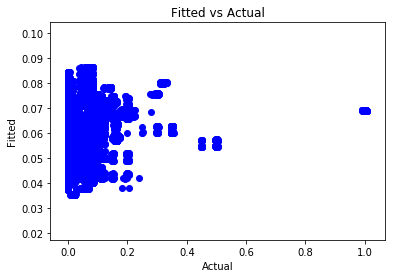

In [11]:
fig, ax = plt.subplots()
ax.scatter(y, predicted,color='blue')
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Fitted')
plt.title('Fitted vs Actual')
plt.show()

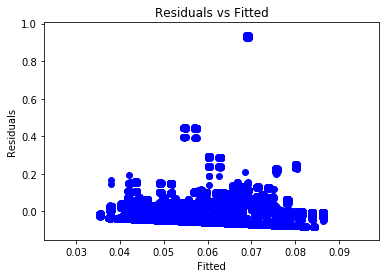

In [12]:
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.scatter(predicted, y - predicted, color='blue', lw=1, label='residual')
#plt.plot([y.min(), y.max()], [0,0], 'k--', lw=4)
plt.show()

### Part ii

In [13]:
scaler = StandardScaler()
df2 = scaler.fit_transform(df)
print(df2[0])

[-1.62003968 -1.51932107 -1.455772   -1.42689367 -1.68739471 -0.58531252
 -0.9891194 ]


In [14]:
X_new = df2[:,0:5]
y_new = df2[:,5]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.1, random_state=0)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print ("Coefficients:", linreg.coef_)
print ("Intercept:", linreg.intercept_)
y_predict = linreg.predict(X_test)
print("RMSE without cross validation:", np.sqrt(mean_squared_error(y_test, y_predict)))

Coefficients: [-0.00184992 -0.04606465  0.09071622 -0.00563138  0.04040322]
Intercept: -0.0020642502433
RMSE without cross validation: 1.02221148954


In [16]:
regressor = LinearRegression()
tr_l,ts_l,bestModel = perform_10fold(X_new,y_new,regressor)

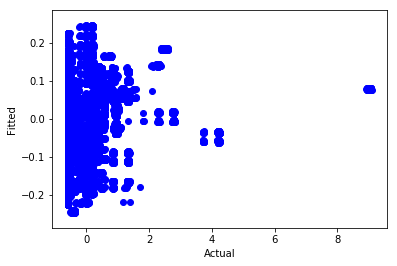

In [17]:
predicted = bestModel.predict(X_new)
fig, ax = plt.subplots()
ax.scatter(y_new, predicted,color='blue')
#ax.plot([y_new.min(), y_new.max()], [y_new.min(), y_new.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Fitted')
plt.show()

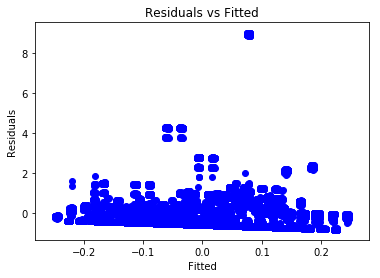

In [18]:
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.scatter(predicted, y_new - predicted, color='blue', lw=1, label='residual')
#plt.plot([y_new.min(), y_new.max()], [0,0], 'k--', lw=4)
plt.show()

### Part iii

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression

In [20]:
X = df[
    ['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']].values
y = df['Size of Backup (GB)'].values

In [21]:
selectbest = SelectKBest(f_regression,k=3)
X_f = selectbest.fit_transform(X, y)
selectbest.scores_

array([  8.45006257e-03,   3.88163798e+01,   1.50740934e+02,
         2.61386654e+01,   2.53200943e+01])

#### Best features from f_regression = Day of the week, Backup time - hour of day, workflow id

In [22]:
selectbest2 = SelectKBest(mutual_info_regression,k=3)
X_mi = selectbest2.fit_transform(X, y)
selectbest2.scores_

/Users/satya/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([ 0.00382869,  0.22738047,  0.2344301 ,  0.27446085,  0.43143095])

#### Best features from mutual_info_regression = Backup time - hour of day, workflow id, file name

In [23]:
regressor = LinearRegression()
tr_l,ts_l,bestModel_f = perform_10fold(X_f,y,regressor)

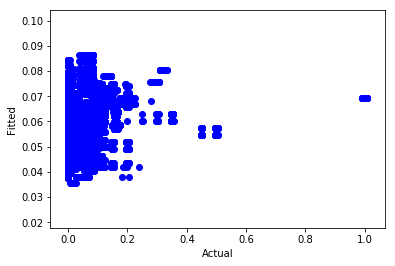

In [24]:
predicted = bestModel_f.predict(X_f)
fig, ax = plt.subplots()
ax.scatter(y, predicted,color='blue')
#ax.plot([y_new.min(), y_new.max()], [y_new.min(), y_new.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Fitted')
plt.show()

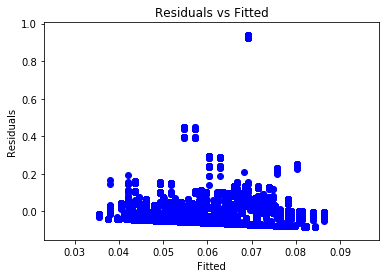

In [25]:
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.scatter(predicted, y - predicted, color='blue', lw=1, label='residual')
#plt.plot([y_new.min(), y_new.max()], [0,0], 'k--', lw=4)
plt.show()

In [26]:
regressor = LinearRegression()
tr_l,ts_l,bestModel_mi = perform_10fold(X_mi,y,regressor)

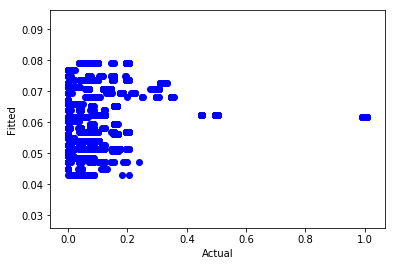

In [27]:
predicted = bestModel_mi.predict(X_mi)
fig, ax = plt.subplots()
ax.scatter(y, predicted,color='blue')
#ax.plot([y_new.min(), y_new.max()], [y_new.min(), y_new.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Fitted')
plt.show()

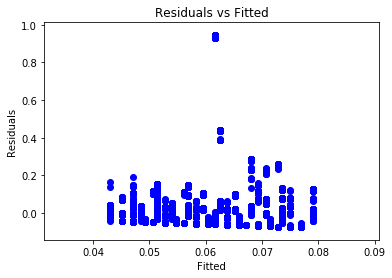

In [28]:
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.scatter(predicted, y - predicted, color='blue', lw=1, label='residual')
#plt.plot([y_new.min(), y_new.max()], [0,0], 'k--', lw=4)
plt.show()